# Clustering Antartic Penguin Species

Gustavo Gutierrrez Navarro

01/09/2024

---

## 1. Librerias
---

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Dataset
---

In [219]:
penguins_df = pd.read_csv('penguins.csv')
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE
328,46.8,14.3,215.0,4850.0,FEMALE
329,50.4,15.7,222.0,5750.0,MALE
330,45.2,14.8,212.0,5200.0,FEMALE


## 3. Análisis exploratorio de datos
---


In [220]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [221]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


### 3.1 Valores faltantes

In [222]:
print(penguins_df.isnull().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### 3.2 Variables numéricas
Explorar la distribución de las variables y detectar valores extremos.

In [223]:
numeric_vars = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

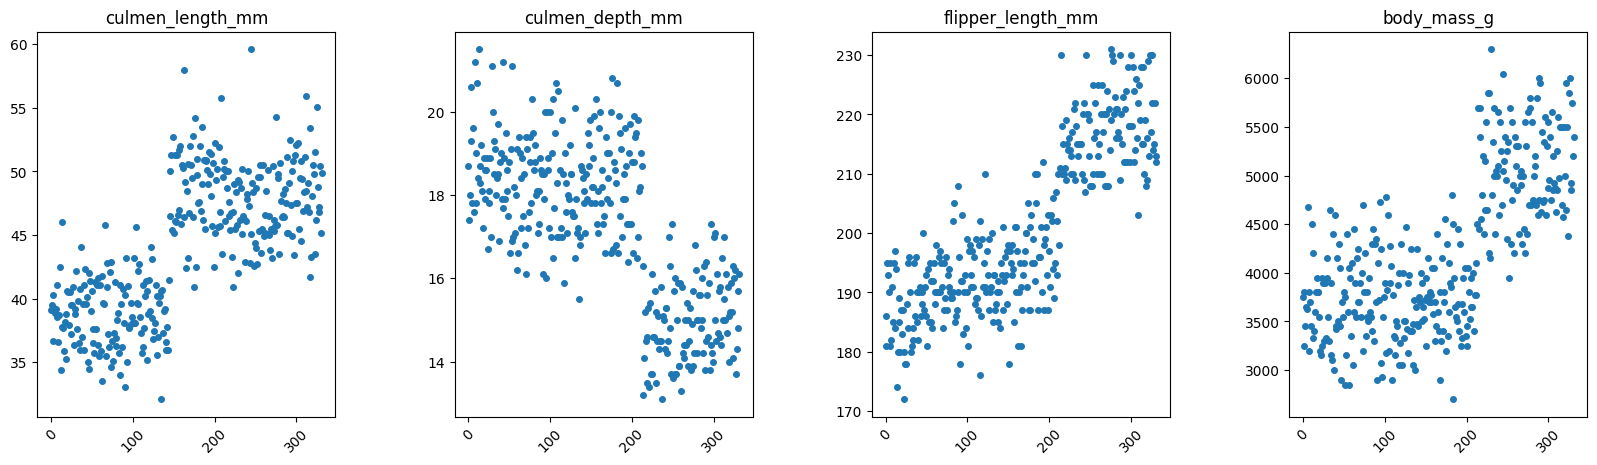

In [224]:
fig = plt.figure(figsize=(20, 5))

for i, col in enumerate(numeric_vars):
    ax_i = fig.add_subplot(1, len(numeric_vars), i + 1)
    ax_i.set_title(col)
    ax_i.plot(penguins_df[col], marker='o', linewidth=0, markersize=4)

plt.subplots_adjust(wspace=0.4)

for ax in fig.get_axes():
    ax.tick_params(axis='x', rotation=45)

plt.show()

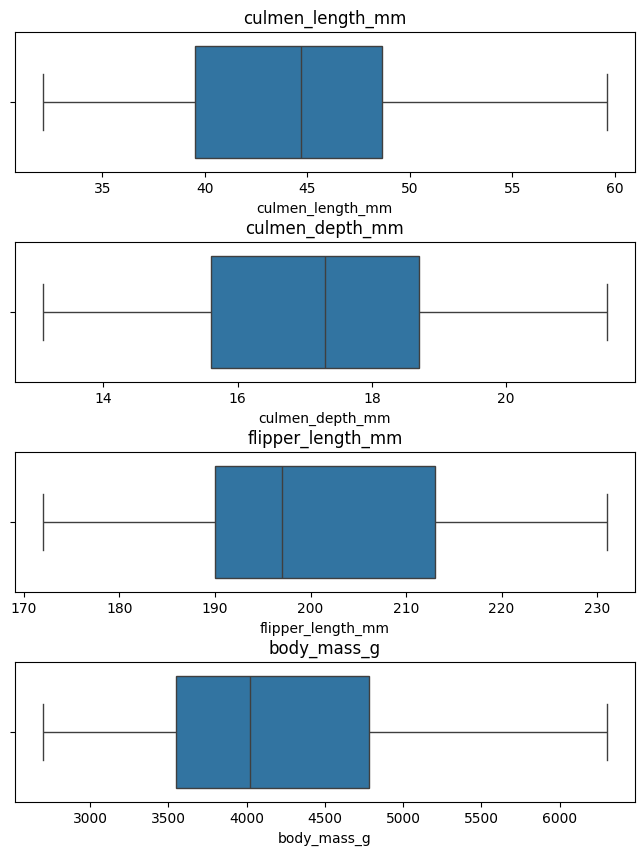

In [225]:
fig, ax = plt.subplots(nrows=4, ncols=1 , figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(numeric_vars):
    sns.boxplot(x=col, data=penguins_df, ax=ax[i])
    ax[i].set_title(col)

### 3.3 Variables categóricas
Explorar las distintas variables categóricas para determinar su tipo y comportamiento ademas detectar repetición de respuestas.

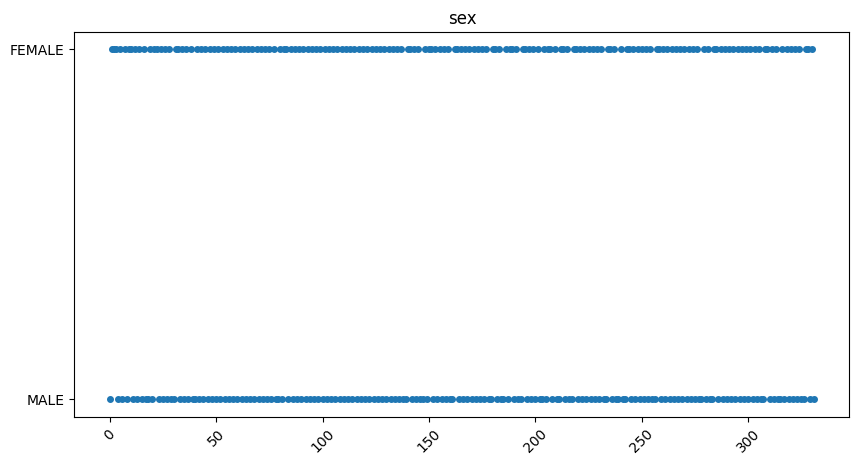

In [226]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('sex')
ax.plot(penguins_df['sex'], marker='o', linewidth=0, markersize=4)

ax.tick_params(axis='x', rotation=45)

plt.show()

### 3.5 Resumen
*Durante el análisis exploratorio de datos se encontraron los siguientes puntos a tomar en cuenta:*

- La variable sex será reemplazada por los valores 0 (masculino) y 1 (femenino).

- Para la distribución se utilizará una estándar para manejar los datos de mejor manera.

## 4. Limpieza de datos
---

### 4.1 Manejo de variables categóricas

In [227]:
penguins_df["sex"].replace({"MALE":0, "FEMALE":1}, inplace=True)

### 4.5 Estandarización de datos 

In [228]:
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(penguins_df)

s_penguins_df = pd.DataFrame(standardized_data, columns=penguins_df.columns)

### 4.6 Resumen de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    float64
dtypes: float64(5)
memory usage: 13.1 KB
None


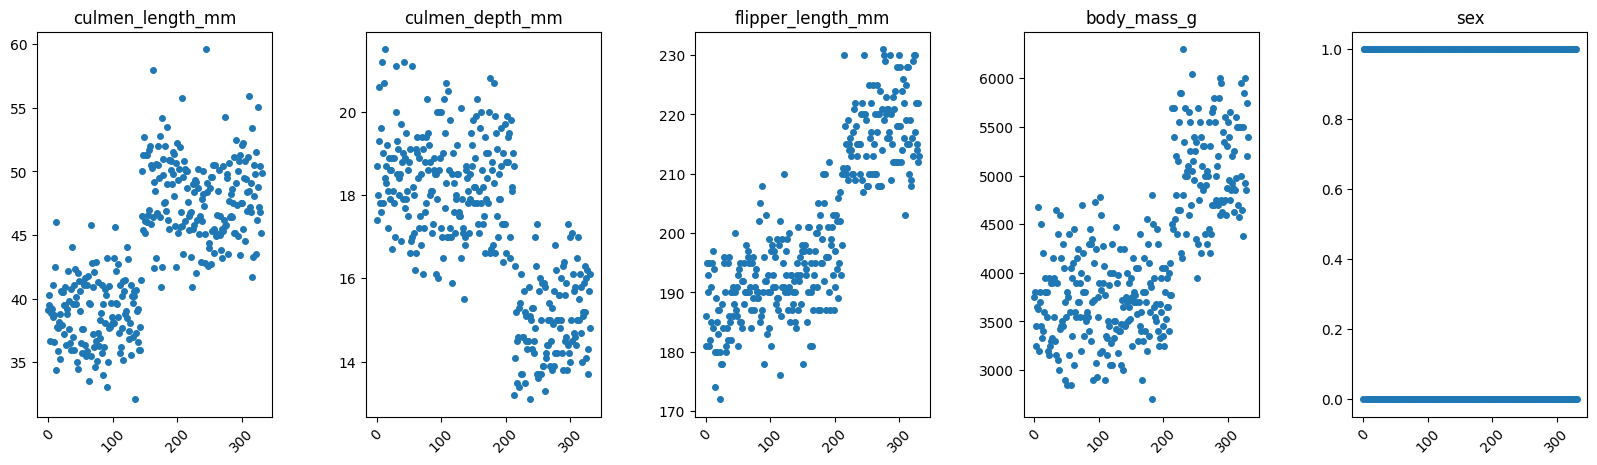

In [229]:
print(s_penguins_df.info())

fig = plt.figure(figsize=(20, 5))

for i, col in enumerate(s_penguins_df.columns.tolist()):
    ax_i = fig.add_subplot(1, len(s_penguins_df.columns), i + 1)
    ax_i.set_title(col)
    ax_i.plot(penguins_df[col], marker='o', linewidth=0, markersize=4)

plt.subplots_adjust(wspace=0.4)

for ax in fig.get_axes():
    ax.tick_params(axis='x', rotation=45)

plt.show()

## 5. Clustering
---

### 5.1 Elbow Method

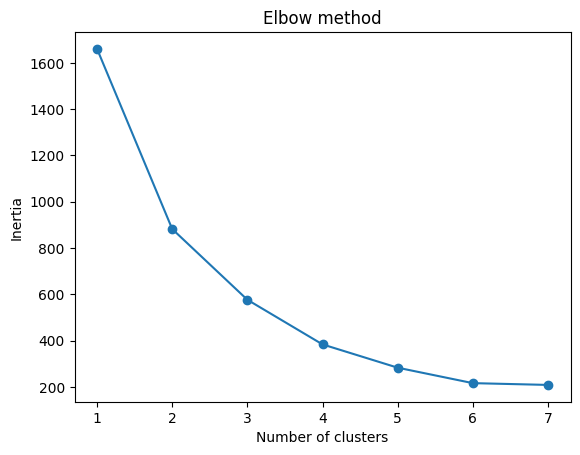

In [230]:
inertias = []

for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(s_penguins_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,8), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

El número óptimo de clusters, segun este método son 3.

### 5.2 K-means
Ahora ya con la información anterior comenzamos con el clustering.

In [231]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(s_penguins_df)

penguins_df['label'] = kmeans.labels_


cluster_labels = kmeans.labels_
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'label'],
      dtype='object')

In [232]:
stat_penguins = penguins_df.groupby('label')[numeric_vars].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879


## 6. Evaluación del modelo

In [233]:
silhouette_avg = silhouette_score(penguins_df, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3262808388286015


Según el proyecto, existen tres clases de pingüinos y, aunque la silueta no nos dice mucho, en relación a la imagen sí parece dividida de manera regular, esto nos indica que el método usado (k-means) resulte insuficiente.